Data cleaning and transformation

In [1]:
# Import dataset
import pandas as pd

df = pd.read_csv('London_Listings.csv')

In [2]:
# Show the shape of the dataset
df.shape

(66679, 31)

In [3]:
# List of all categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_vars

['name',
 'description',
 'host_name',
 'host_since',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'neighbourhood',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'price',
 'calendar_last_scraped',
 'first_review',
 'last_review']

In [4]:
# List of all numerical variables
numerical_vars = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_vars

['id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'calculated_host_listings_count']

In [5]:
# Remove "$" and convert price to numeric
df["price"] = df["price"].replace("[\$,]", "", regex=True).astype(float)
df.loc[:,'price']

,price
0,200.0
1,675.0
2,95.0
3,166.0
4,105.0
...,...
66674,305.0
66675,75.0
66676,182.0
66677,121.0


In [6]:
import numpy as np

def replace_empty(x):
    if isinstance(x, list) and len(x) == 0:
        return np.nan
    return x

# Replace empty strings with NaN and handle empty lists for categorical columns
for col in categorical_vars:
    df[col] = df[col].replace({'': np.nan})
    df[col] = df[col].apply(replace_empty)

# Verify by checking the unique values in each categorical column
for col in categorical_vars:
    print(f"Unique values in {col} after cleaning:", df[col].unique())

Unique values in name after cleaning: ['1' '117' '- Bright Central London Apartment -' ... 'Zone2'
 'Zoya’s Place in Harrow' '#NAME?']
Unique values in description after cleaning: [nan
 'Get comfortable and enjoy plenty of extra room at this spacious place.'
 'Keep it simple at this peaceful and centrally-located place.' ...
 'Welcome to our Family home in Harrow, London! <br /><br />Perfect for families and groups, this property features 2 spacious double bedrooms and 1 single bedroom with lots of storage, offering comfort and convenience for all guests. One bathroom and an additional WC room is equipped with all essentials, ensuring a relaxing and enjoyable stay for everyone.'
 'Enjoy an Entire Private Studio apartment located in Brick Lane, near Aldgate East/Liverpool St/Shoreditch/London.<br /><br />A big size room has a double bed, Bedside, TV, fan, heater, wardrobe etc.<br /><br />The kitchen is fitted with all the necessary appliances you may need, including an oven & cooker, mi

In [7]:
# Show a summary of missing values
missing_values_summary = df.isnull().sum()
print("Missing values summary:")
missing_values_summary

Missing values summary:


,0
id,0
name,0
description,1956
host_id,0
host_name,1
host_since,1
host_response_rate,10175
host_acceptance_rate,7146
host_is_superhost,380
host_listings_count,1


In [8]:
# Show summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
df[numerical_vars].describe()


Summary statistics for numerical variables:


,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count
count,6.667900e+04,6.667900e+04,66678.000000,66678.000000,66679.000000,66679.000000,66679.000000,61350.000000,66578.000000,61279.000000,66679.000000,6.667900e+04,66679.000000,51943.000000,66679.000000
mean,6.129241e+17,2.058000e+08,28.557110,53.579606,51.509255,-0.128281,3.417733,1.369641,1.542011,1.644022,5.207742,8.328149e+03,23.855352,4.696031,16.794538
std,4.728136e+17,1.975357e+08,152.576905,354.866876,0.049343,0.103179,2.106704,0.754722,1.033766,1.510706,19.090368,2.032567e+06,51.321841,0.450932,52.043637
min,1.391300e+04,2.594000e+03,1.000000,1.000000,51.295937,-0.497800,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,1.000000
25%,3.982489e+07,2.764800e+07,1.000000,1.000000,51.484038,-0.190809,2.000000,1.000000,1.000000,1.000000,1.000000,9.000000e+01,1.000000,4.590000,1.000000
50%,8.040000e+17,1.274832e+08,2.000000,4.000000,51.513359,-0.130316,3.000000,1.000000,1.000000,1.000000,2.000000,3.650000e+02,7.000000,4.830000,2.000000
75%,1.030000e+18,4.024643e+08,11.000000,15.000000,51.538195,-0.068940,4.000000,1.500000,2.000000,2.000000,4.000000,7.300000e+02,24.000000,5.000000,9.000000
max,1.180000e+18,5.831673e+08,2566.000000,6297.000000,51.681642,0.295731,16.000000,40.000000,50.000000,40.000000,1124.000000,5.248556e+08,1678.000000,5.000000,441.000000


In [9]:
# Show summary statistics for categorical variables (including count, unique, top, and freq)
print("\nSummary statistics for categorical variables:")
df[categorical_vars].describe()


Summary statistics for categorical variables:


,price
count,61418.000000
mean,209.987202
std,961.450873
min,0.000000
25%,78.000000
50%,138.000000
75%,227.000000
max,80000.000000


In [10]:
# Show summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count
count,6.667900e+04,6.667900e+04,66678.000000,66678.000000,66679.000000,66679.000000,66679.000000,61350.000000,66578.000000,61279.000000,61418.000000,66679.000000,6.667900e+04,66679.000000,51943.000000,66679.000000
mean,6.129241e+17,2.058000e+08,28.557110,53.579606,51.509255,-0.128281,3.417733,1.369641,1.542011,1.644022,209.987202,5.207742,8.328149e+03,23.855352,4.696031,16.794538
std,4.728136e+17,1.975357e+08,152.576905,354.866876,0.049343,0.103179,2.106704,0.754722,1.033766,1.510706,961.450873,19.090368,2.032567e+06,51.321841,0.450932,52.043637
min,1.391300e+04,2.594000e+03,1.000000,1.000000,51.295937,-0.497800,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,1.000000
25%,3.982489e+07,2.764800e+07,1.000000,1.000000,51.484038,-0.190809,2.000000,1.000000,1.000000,1.000000,78.000000,1.000000,9.000000e+01,1.000000,4.590000,1.000000
50%,8.040000e+17,1.274832e+08,2.000000,4.000000,51.513359,-0.130316,3.000000,1.000000,1.000000,1.000000,138.000000,2.000000,3.650000e+02,7.000000,4.830000,2.000000
75%,1.030000e+18,4.024643e+08,11.000000,15.000000,51.538195,-0.068940,4.000000,1.500000,2.000000,2.000000,227.000000,4.000000,7.300000e+02,24.000000,5.000000,9.000000
max,1.180000e+18,5.831673e+08,2566.000000,6297.000000,51.681642,0.295731,16.000000,40.000000,50.000000,40.000000,80000.000000,1124.000000,5.248556e+08,1678.000000,5.000000,441.000000


In [11]:
# Drop specified columns
drop_cols = ['id', 'name', 'description', 'host_id', 'host_name', 'host_since', 'host_response_rate','host_acceptance_rate', 'host_is_superhost',
             'first_review', 'last_review','calendar_last_scraped', 'bathrooms_text', 'latitude', 'longitude', 'amenities',
             'calculated_host_listings_count', 'host_listings_count','host_total_listings_count', 'minimum_nights', 'maximum_nights']

# Drop the specified columns
df = df.drop(columns=drop_cols)

# Show the shape after dropping columns
print("Shape of the dataframe after dropping columns:", df.shape)

Shape of the dataframe after dropping columns: (66679, 10)


In [12]:
# Drop duplicate rows if any
df = df.drop_duplicates()

# Show the shape after dropping duplicates
print("Shape of the dataframe after dropping duplicates:", df.shape)

Shape of the dataframe after dropping duplicates: (64932, 10)


In [13]:
# Drop rows with any NaN values
df = df.dropna()

# Show the shape after dropping rows with NaN values
print("Shape of the dataframe after dropping rows with NaN values:", df.shape)

Shape of the dataframe after dropping rows with NaN values: (46402, 10)


In [14]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,46402.000000,46402.000000,46402.000000,46402.000000,46402.000000,46402.000000,46402.000000
mean,3.386384,1.347183,1.496918,1.655748,197.878626,30.850351,4.687542
std,2.081027,0.649618,0.943982,1.476575,1026.192766,58.701352,0.468971
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,75.000000,4.000000,4.580000
50%,3.000000,1.000000,1.000000,1.000000,134.000000,11.000000,4.830000
75%,4.000000,1.500000,2.000000,2.000000,219.000000,32.000000,5.000000
max,16.000000,16.000000,22.000000,38.000000,80000.000000,1678.000000,5.000000


In [15]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove NaN values in numeric columns before outlier detection
df.dropna(subset=numeric_cols, inplace=True)

# Apply IQR for Outlier Detection (Threshold: 1.5)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
iqr_multiplier = 1.5  # Using a threshold of 1.5 for IQR
iqr_outliers = ((df[numeric_cols] < (Q1 - iqr_multiplier * IQR)) | (df[numeric_cols] > (Q3 + iqr_multiplier * IQR)))

# Remove rows with outliers based on IQR
df_cleaned = df[~iqr_outliers.any(axis=1)]

print(f"Original Shape: {df.shape}")
print(f"Cleaned Shape After Outlier Removal: {df_cleaned.shape}")

Original Shape: (46402, 10)
Cleaned Shape After Outlier Removal: (32240, 10)


Data Exploration

<ipython-input-16-76fe765f3c10>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='neighbourhood', y='price', showfliers=False, palette='coolwarm')


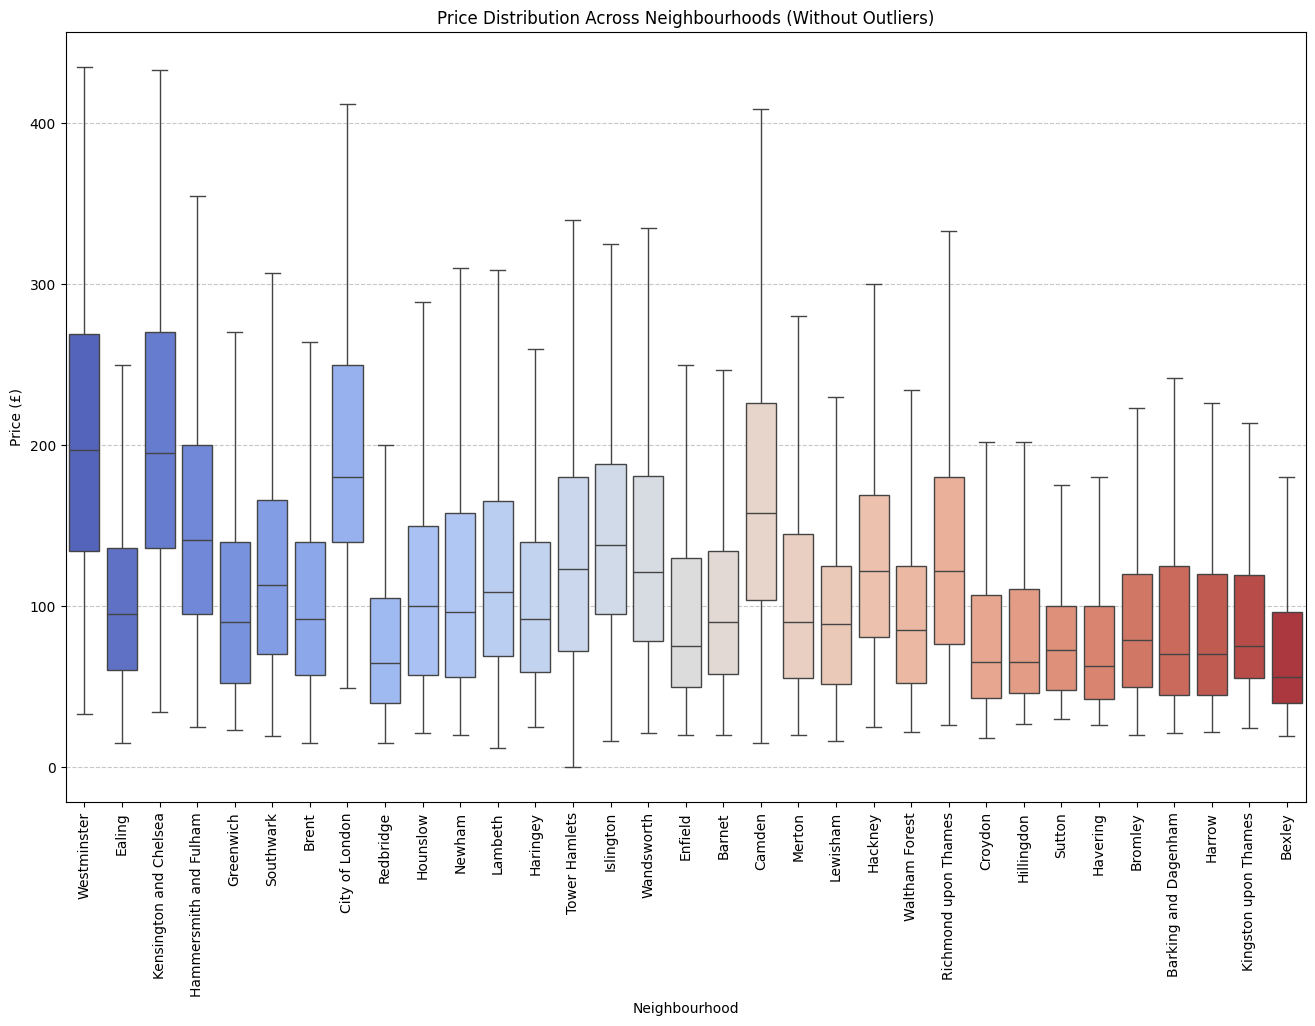

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

# Use boxplot with seaborn
sns.boxplot(data=df_cleaned, x='neighbourhood', y='price', showfliers=False, palette='coolwarm')

# Set labels and title
plt.title('Price Distribution Across Neighbourhoods (Without Outliers)')
plt.xlabel('Neighbourhood')
plt.ylabel('Price (£)')

# Rotate for better readability
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

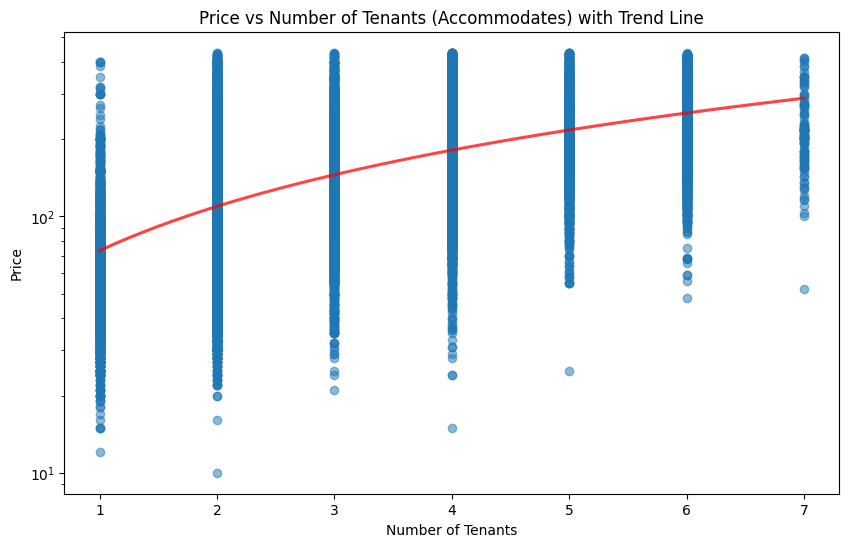

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x='accommodates', y='price', data=df_cleaned, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'alpha': 0.7})
plt.title('Price vs Number of Tenants (Accommodates) with Trend Line')
plt.xlabel('Number of Tenants')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

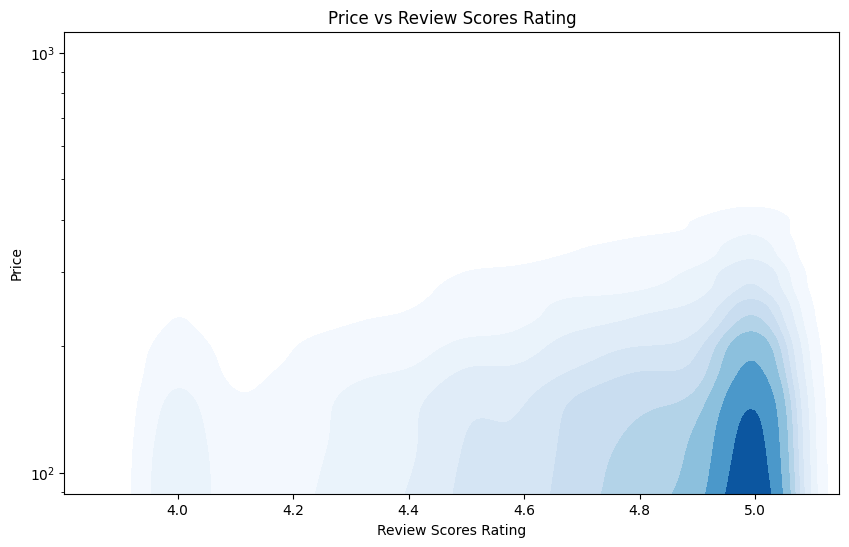

In [18]:
# Scatterplot of price vs review_scores_rating
plt.figure(figsize=(10, 6))
sns.kdeplot(x='review_scores_rating', y='price', data=df_cleaned, cmap='Blues', fill=True)
plt.yscale('log')
plt.title('Price vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()

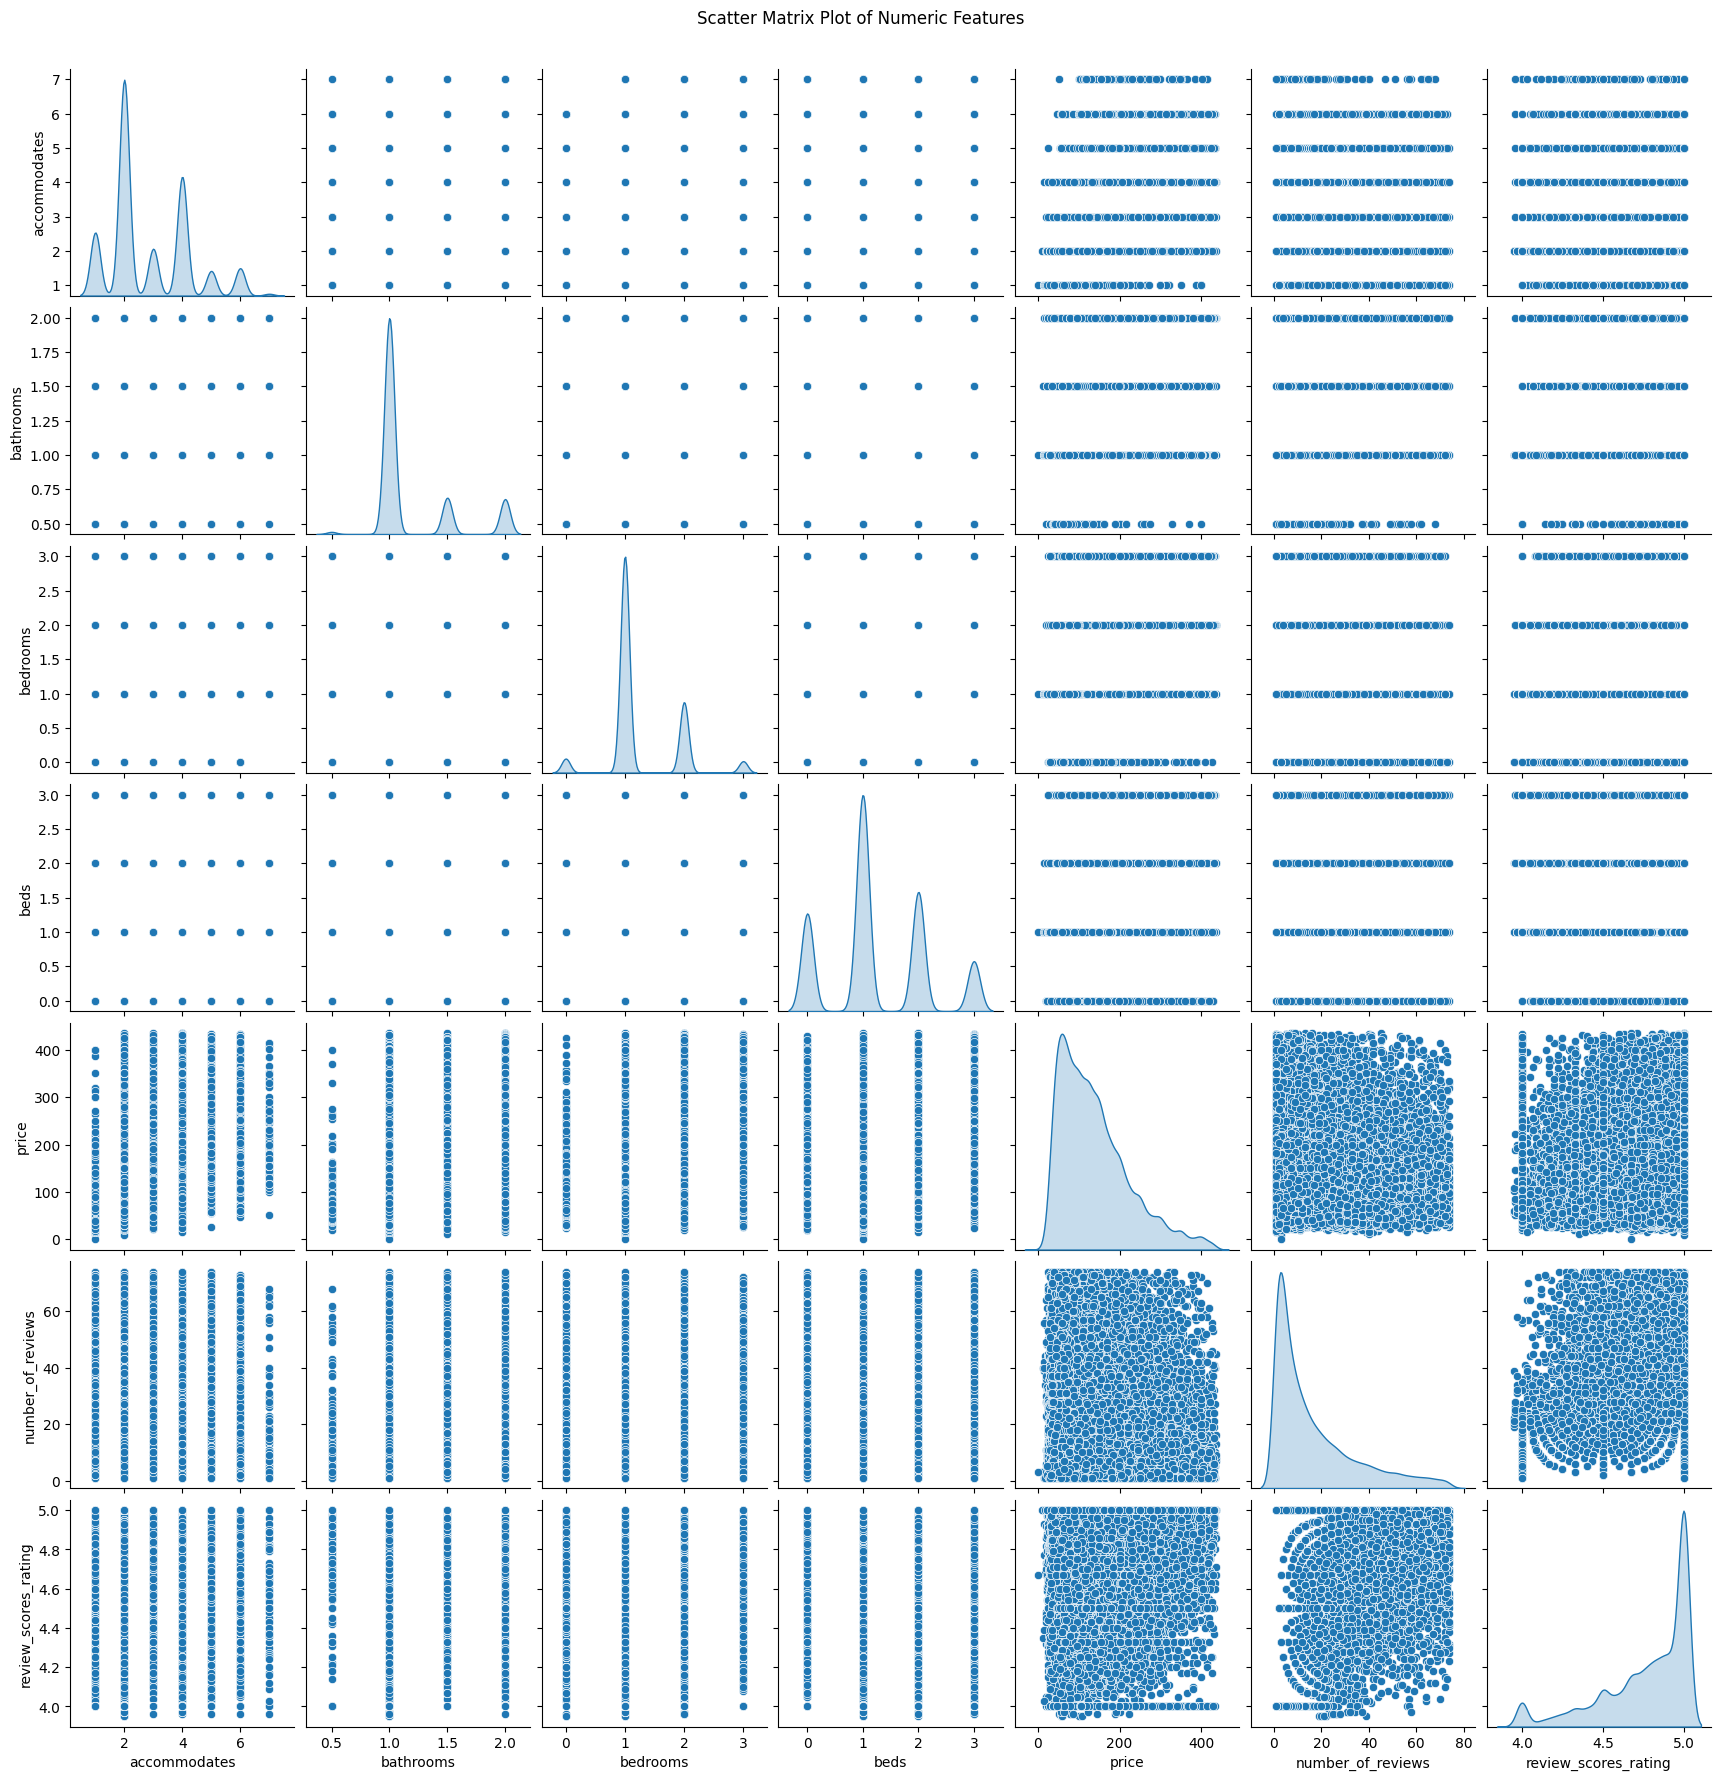

In [19]:
# Scatter matrix plot
sns.pairplot(df_cleaned[numeric_cols], diag_kind='kde')
plt.suptitle('Scatter Matrix Plot of Numeric Features', y=1.02)
plt.show()

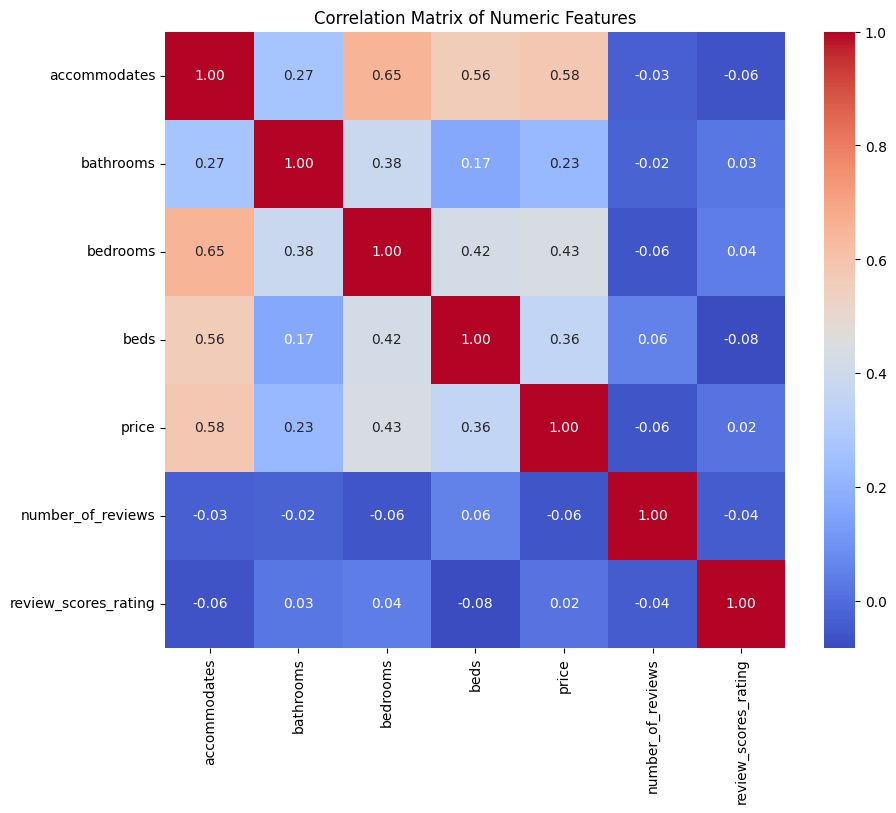

In [20]:
# Calculate correlation matrix
correlation_matrix = df_cleaned[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

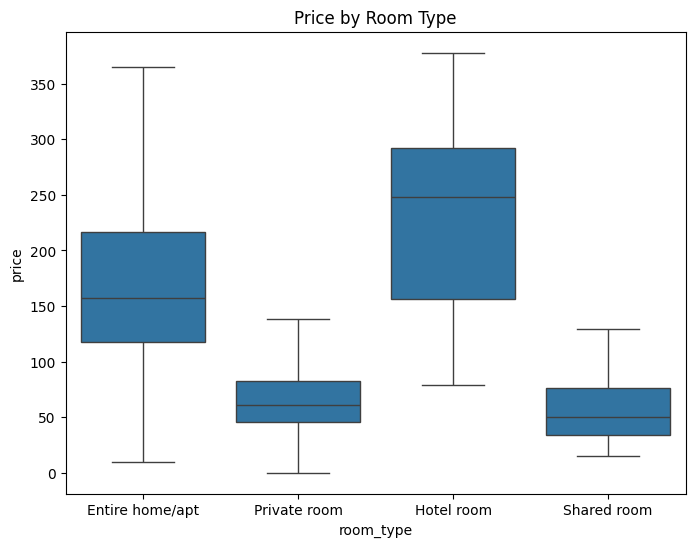

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df_cleaned, showfliers=False)
plt.title('Price by Room Type')
plt.show()

Normalisation done after data exploration

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Identify the numeric columns to scale
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialise and apply MinMaxScaler
scaler = MinMaxScaler()

# Apply transformation and convert it back to a DataFrame
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Display final dataset shape
print(f"Final Cleaned Dataset Shape: {df_cleaned.shape}")

Final Cleaned Dataset Shape: (32240, 10)


<ipython-input-22-217d9fd5d8c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])


Model Building

In [23]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Initialise Spark session
spark = SparkSession.builder.appName("AirbnbPricePrediction").getOrCreate()

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df_cleaned)

# Transform price using log scale to handle skewness
spark_df = spark_df.withColumn('log_price', F.log(spark_df['price'] + 1))

# Handle null values
spark_df = spark_df.filter(spark_df['log_price'].isNotNull())

# Replace nulls in categorical variables
for col_name in ['neighbourhood', 'property_type', 'room_type']:
    spark_df = spark_df.withColumn(col_name, F.when(F.col(col_name).isNull(), 'Unknown').otherwise(F.col(col_name)))

# Select final predictors
selected_features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'review_scores_rating', 'neighbourhood', 'room_type', 'property_type'
]

spark_df = spark_df.select(selected_features + ['log_price'])

# Index and encode categorical features
indexers = [
    StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep")
    for col in ['neighbourhood', 'room_type', 'property_type']
]

encoders = [
    OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded")
    for col in ['neighbourhood', 'room_type', 'property_type']
]

# Assemble feature vector
feature_cols = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
    'neighbourhood_encoded', 'room_type_encoded', 'property_type_encoded'
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Train-test split
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

# Define Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="log_price")

# Create pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, lr])

# Fit model
model = pipeline.fit(train_data)

# Predictions
predictions = model.transform(test_data)

# Evaluate model
evaluator = RegressionEvaluator(labelCol="log_price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.08480505912596868


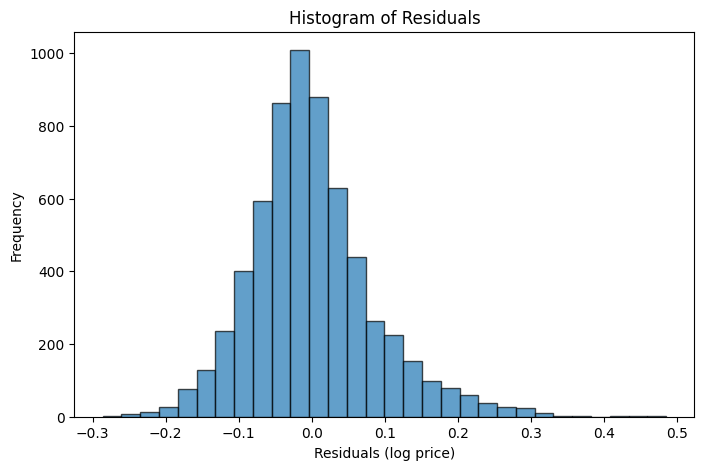

In [24]:
# Convert predictions to Pandas for visualisation
preds_pd = predictions.select("log_price", "prediction").toPandas()

# Calculate residuals
preds_pd["residuals"] = preds_pd["log_price"] - preds_pd["prediction"]

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(preds_pd["residuals"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Residuals (log price)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [25]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Define parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 0.5]) \
    .build()

# CrossValidator with 5 folds
crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=5
)

# Fit cross-validation model
cv_model = crossval.fit(train_data)

# Evaluate on test data
cv_predictions = cv_model.transform(test_data)
cv_rmse = evaluator.evaluate(cv_predictions)
print(f"Cross-Validated RMSE: {cv_rmse}")

Cross-Validated RMSE: 0.08483915644144417


In [26]:
# Used to check accuracy of model

from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="log_price", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print(f"R-squared: {r2}")


R-squared: 0.6282874603394382


In [27]:
evaluator = RegressionEvaluator(labelCol="log_price", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.06317472566123944


In [28]:
# Convert log-transformed prices to original prices
preds_pd['actual_price'] = np.exp(preds_pd['log_price']) - 1
preds_pd['predicted_price'] = np.exp(preds_pd['prediction']) - 1

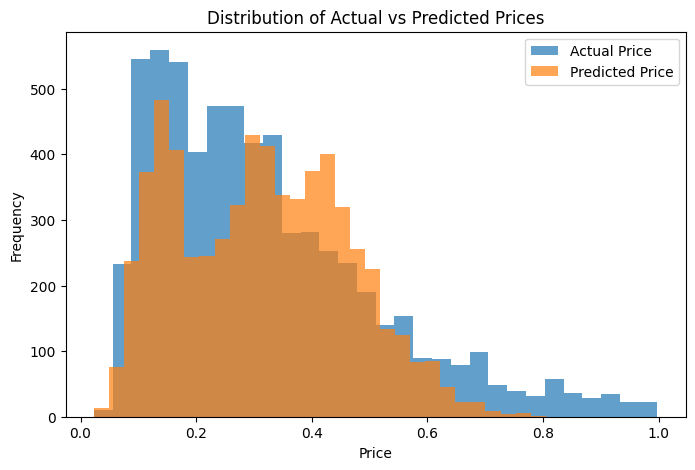

In [29]:
# Plot distribution of actual vs predicted prices
plt.figure(figsize=(8, 5))
plt.hist(preds_pd['actual_price'], bins=30, alpha=0.7, label='Actual Price')
plt.hist(preds_pd['predicted_price'], bins=30, alpha=0.7, label='Predicted Price')
plt.title("Distribution of Actual vs Predicted Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## **Improve the model**

Using K-Means

In [48]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline

# Define the assembler to create 'features' column
assembler = VectorAssembler(
    inputCols=[
        'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
        'neighbourhood_encoded', 'room_type_encoded', 'property_type_encoded'
    ],
    outputCol="features"
)

# Apply the transformations (StringIndexer, OneHotEncoder)
indexer_and_encoder_stages = indexers + encoders

# Create the pipeline excluding the assembler
pipeline = Pipeline(stages=indexer_and_encoder_stages)

# Fit the pipeline on the training data and transform it
train_data_transformed = pipeline.fit(train_data).transform(train_data)
test_data_transformed = pipeline.fit(train_data).transform(test_data)

# to create 'features' column in both train and test data
train_data_with_features = assembler.transform(train_data_transformed)
test_data_with_features = assembler.transform(test_data_transformed)

# Fit the StandardScaler on the training data
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(train_data_with_features)  # Fit on training data

# Transform both the training and test data using the fitted scaler model
train_data_with_scaled_features = scaler_model.transform(train_data_with_features)
test_data_with_scaled_features = scaler_model.transform(test_data_with_features)


# Fit the KMeans model on the transformed and scaled training data
kmeans = KMeans(featuresCol="scaled_features", k=3)
kmeans_model = kmeans.fit(train_data_with_scaled_features)

# to make predictions and evaluate the model
test_clusters = kmeans_model.transform(test_data_with_scaled_features)

# Evaluate clustering performance
evaluator = ClusteringEvaluator(predictionCol="prediction")
silhouette_score = evaluator.evaluate(test_clusters)
print(f"Silhouette Score: {silhouette_score}")



Silhouette Score: 0.3625737637420573


In [43]:
# Predict clusters for the test data
test_clusters = kmeans_model.transform(test_data_with_features)

In [44]:
# Evaluate clustering performance
evaluator = ClusteringEvaluator(predictionCol="prediction")
silhouette_score = evaluator.evaluate(test_clusters)
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.3790644159487658


In [45]:
# Show cluster distribution
cluster_counts = test_clusters.groupBy("prediction").count().toPandas()
print("Cluster distribution on the test set:\n", cluster_counts)

Cluster distribution on the test set:
    prediction  count
0           1   2206
1           2   2656
2           0   1433


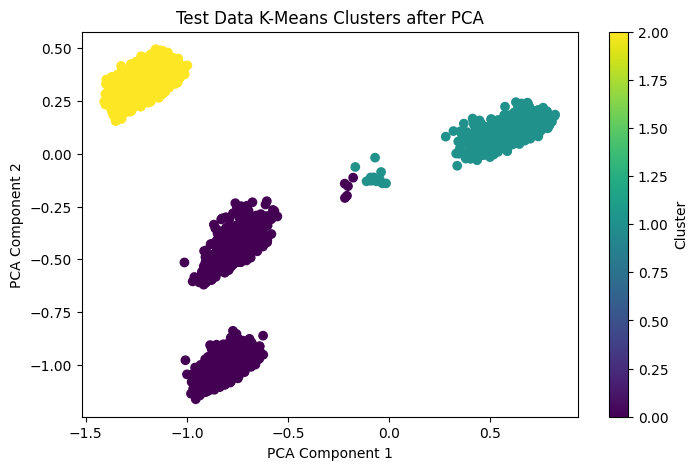

In [34]:
# Visualise the clusters using PCA
from pyspark.ml.feature import PCA

# Convert clusters to Pandas for visualisation
test_clusters_pd = test_clusters.select("features", "prediction").toPandas()

pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(test_clusters)
test_pca = pca_model.transform(test_clusters)

# Convert to Pandas DataFrame for visualisation
test_pca_pd = test_pca.select("pca_features", "prediction").toPandas()
test_pca_pd["x"] = test_pca_pd["pca_features"].apply(lambda x: x[0])
test_pca_pd["y"] = test_pca_pd["pca_features"].apply(lambda x: x[1])

# Plot test data clusters
plt.figure(figsize=(8, 5))
plt.scatter(test_pca_pd["x"], test_pca_pd["y"], c=test_pca_pd["prediction"], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Test Data K-Means Clusters after PCA')
plt.show()

In [55]:
centroids = kmeans_model.clusterCenters()  # Get the centroids
print(centroids)

[array([5.88483563e-01, 1.90792694e+00, 1.73351448e+00, 1.00216058e+00,
       3.02145285e+00, 1.80998879e-01, 2.78198745e-01, 1.83308825e-01,
       1.04166189e-01, 2.06190457e-01, 2.65668373e-01, 1.82574025e-01,
       2.38558098e-01, 2.54394542e-01, 1.67427465e-01, 2.64000892e-01,
       2.41363637e-01, 2.11792816e-01, 1.87411161e-01, 1.84933888e-01,
       1.89621962e-01, 2.09677596e-01, 2.00242853e-01, 2.22119983e-01,
       1.97083858e-01, 1.45591592e-01, 1.35176508e-01, 1.65343234e-01,
       2.14764631e-01, 1.44458091e-01, 1.90763984e-01, 1.54241673e-01,
       1.43816587e-01, 1.67465258e-01, 1.30120096e-01, 2.20091062e-02,
       9.81229702e-02, 1.19005315e-01, 8.15017396e-04, 2.06704670e+00,
       1.72589271e-01, 1.46452907e-01, 0.00000000e+00, 0.00000000e+00,
       1.30503164e+00, 1.24431385e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.11568447e-01, 0.00000000e+00, 2.47986699e-01,
       2.26602054e-01, 0.00000000e+00, 2.15641022e-01, 0.00000000e+00,
     